# Connectivity analysis
-----------------------

Grab the .csv files (Created using extract_timecourse.ipynb), turn back to numpy and create connectivity matrix

In [33]:
import pandas as pd 
from nilearn.connectome import ConnectivityMeasure
import numpy as np
import os
import glob
import nilearn

import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

In [29]:
# grab all files
ts_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/ZivResults/timecourse/sub-*_shen-2mm.csv')
output_dir = '/gpfs/gibbs/pi/levy_ifat/Or/ZivResults/corMatrix/'

In [ ]:
# set the kind, can choose partial correlation, tangent or correlation
connectome_measure = ConnectivityMeasure(kind='correlation')

In [31]:
# loading as numpy array (for connectivity)
for file in ts_files:
    f = np.loadtxt(file, delimiter=",",skiprows=1)
    sub = os.path.basename(file).split('_')[0] # get subject number
    # generate correlation matrix.
    # Bacause we save each subject to .csv file, we need to expand dimentions of the matrix (as fit_transform takes n_subs X ts X ROI)
    cor = connectome_measure.fit_transform(np.expand_dims(f, 0))
    pd.DataFrame(cor[0,:,:]).to_csv(f'{output_dir}{sub}_shen_matrix.csv', index=False)
    

<AxesSubplot:>

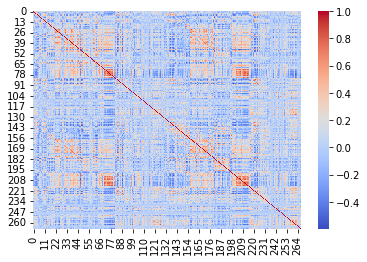

In [36]:
sns.heatmap(pd.read_csv('/gpfs/gibbs/pi/levy_ifat/Or/ZivResults/corMatrix/sub-0034_shen_matrix.csv'),
            cmap='coolwarm'
   )

<AxesSubplot:>

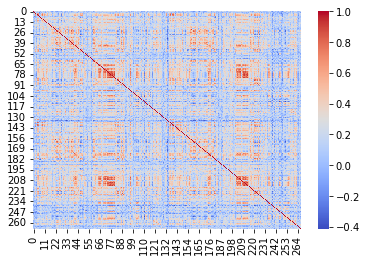

In [38]:
sns.heatmap(pd.read_csv('/gpfs/gibbs/pi/levy_ifat/Or/ZivResults/corMatrix/sub-0366_shen_matrix.csv'),
            cmap='coolwarm'
   )